### Step 1: Load and Merge Data

We have three sheets:
- Sector info (symbol → sector)
- Stock prices from 2010–2020
- Stock prices from 2021–2024

Let’s load and merge these sheets into a single DataFrame.

In [39]:
import pandas as pd

pd.set_option('display.max_rows', 80000)

# excel load
excel_file = './stock_market_data.xlsx'

# read sheets
sector_df = pd.read_excel(excel_file, sheet_name='Sector')
prices_2010_2020 = pd.read_excel(excel_file, sheet_name='2010-2020')
prices_2021_2024 = pd.read_excel(excel_file, sheet_name='2021-2024')

# marge the two price dataframes
price_df = pd.concat([prices_2010_2020, prices_2021_2024], ignore_index=True)

# convert date column to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# filter out 2010 and 2011 data due the bubble brust issue
# in 2011 2012 banking sector share lot was devided by 10
price_df = price_df[~price_df['Date'].dt.year.isin([2010, 2011])]


# Show preview
print(sector_df.head())
price_df.head(10)


       Symbol        Sector
0   1JANATAMF  MUTUAL FUNDS
1     1STBSRS  MUTUAL FUNDS
2      1STICB  MUTUAL FUNDS
3  1STPRIMFMF  MUTUAL FUNDS
4      2NDICB  MUTUAL FUNDS


,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Value
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


### Step 2: Clean and Prepare the Data

Now we will:
- Convert the 'Date' column to datetime format  
- Merge with the sector info  
- Keep only 'Date', 'Sector', and 'Closing_Price'  
- Sort the data chronologically


In [40]:
# convert data to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# marge the sector information with the price data
merged_df = pd.merge(price_df, sector_df, on='Symbol', how='left')

# drop unnecessary columns
clean_df = merged_df[['Date', 'Sector', 'Closing_Price']]

#debug sectoral data
# clean_df = merged_df[['Date','Symbol', 'Sector', 'Closing_Price']]

# Sort the data by Date
clean_df = clean_df.sort_values(by=['Date','Sector']).reset_index(drop=True)

# # show only treasury bond data
# clean_df = clean_df[clean_df['Sector'] == 'TRAVEL LEISURE']

clean_df.head(50)


,Date,Sector,Closing_Price
0,2012-01-01,BANK,68.7
1,2012-01-01,BANK,38.2
2,2012-01-01,BANK,38.2
3,2012-01-01,BANK,45.3
4,2012-01-01,BANK,53.9
5,2012-01-01,BANK,44.3
6,2012-01-01,BANK,164.3
7,2012-01-01,BANK,66.8
8,2012-01-01,BANK,28.2
9,2012-01-01,BANK,26.9


### Step 3: Feature Engineering - Add Time-Based Columns

We extract useful time-based features such as:
- Year
- Month
- Month Name
- Quarter

These will help in grouping sector performance seasonally or over time.


In [41]:
# Extract time-based features from the Date column
clean_df['Year'] = clean_df['Date'].dt.year
clean_df['Month'] = clean_df['Date'].dt.month
clean_df['Month_Name'] = clean_df['Date'].dt.month_name()
clean_df['Quarter'] = clean_df['Date'].dt.quarter

# Preview the updated DataFrame
clean_df.head(50)

,Date,Sector,Closing_Price,Year,Month,Month_Name,Quarter
0,2012-01-01,BANK,68.7,2012,1,January,1
1,2012-01-01,BANK,38.2,2012,1,January,1
2,2012-01-01,BANK,38.2,2012,1,January,1
3,2012-01-01,BANK,45.3,2012,1,January,1
4,2012-01-01,BANK,53.9,2012,1,January,1
5,2012-01-01,BANK,44.3,2012,1,January,1
6,2012-01-01,BANK,164.3,2012,1,January,1
7,2012-01-01,BANK,66.8,2012,1,January,1
8,2012-01-01,BANK,28.2,2012,1,January,1
9,2012-01-01,BANK,26.9,2012,1,January,1


### Step 4: Monthly Sector Aggregation

- We’ll group the cleaned data by `Sector+Month+Year`.
- Market behavior in `2010 ≠ 2020 ≠ 2024`. So for monthly aggregation `year` is a senstive feeature
- Events like COVID, political shifts, inflation, etc. affect different years uniquely.
- So basically grouping by month alone captures just s`easonality`. But adding year shows the `seasonal trends over time`.


In [42]:
# Group by Sector, Year, and Month to calculate average closing price
monthly_avg_df = clean_df.groupby(['Sector', 'Year', 'Month']).agg(
    Avg_Closing_Price=('Closing_Price', 'mean')
).reset_index()

# Optional: Sort for readability
monthly_avg_df = monthly_avg_df.sort_values(by=['Sector', 'Year', 'Month'])

# Preview
monthly_avg_df.head(20)

,Sector,Year,Month,Avg_Closing_Price
0,BANK,2012,1,45.164492
1,BANK,2012,2,38.211681
2,BANK,2012,3,37.326995
3,BANK,2012,4,38.848930
4,BANK,2012,5,35.860289
5,BANK,2012,6,31.906511
6,BANK,2012,7,29.084921
7,BANK,2012,8,28.204762
8,BANK,2012,9,30.368095
9,BANK,2012,10,31.720877


### Step 5: Visualize Sectoral Performance with a Heatmap

In this step, we create a heatmap to visualize how different sectors have performed over time.

**Purpose:**
- To identify seasonal patterns and trends in sector performance.
- To observe how each sector's average closing price changes across months and years.

**How it works:**
- We group the data by `Sector`, `Year`, and `Month`.
- We calculate the average closing price for each combination.
- We reshape the data using a pivot table to prepare it for a heatmap.
- We plot the heatmap using Seaborn for visual insight.

This gives us a powerful tool to spot sectoral momentum, seasonal booms, and consistent performers.

📌 *Brighter colors indicate higher average closing prices.*


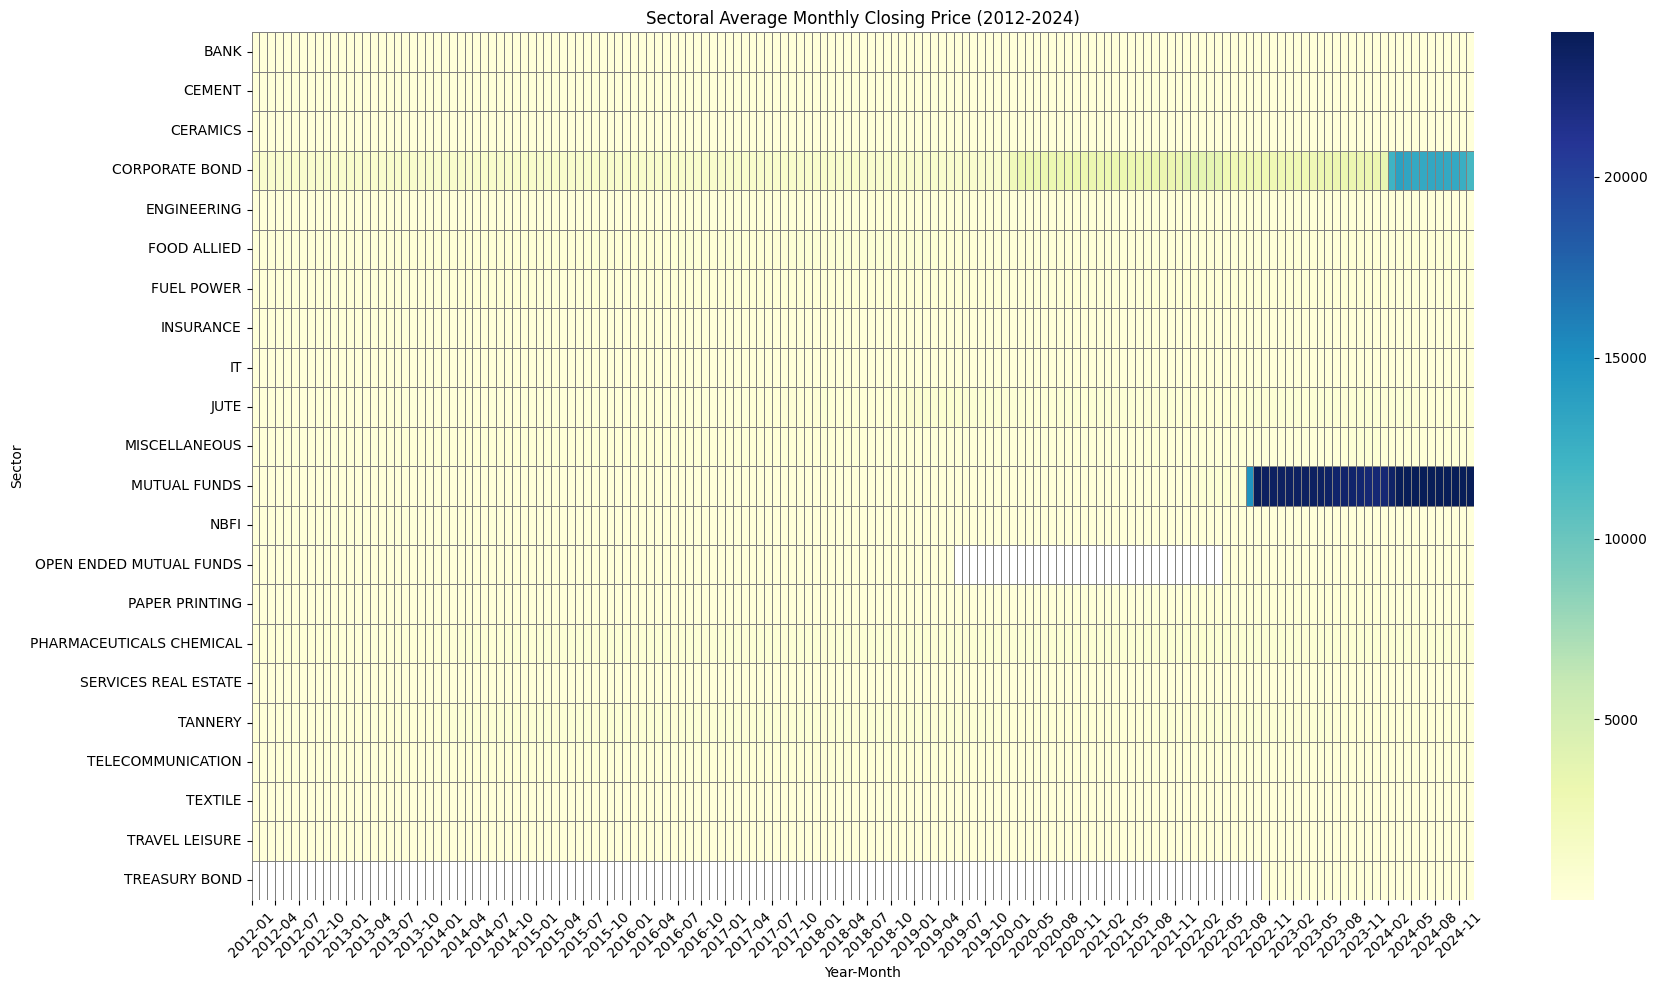

YearMonth,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BANK,45.164492,38.211681,37.326995,38.848930,35.860289,31.906511,29.084921,28.204762,30.368095,31.720877,29.124000,29.327846,29.826087,30.041228,27.381168,23.785413,23.724662,24.779800,23.165000,21.884222,20.991793,21.176809,24.660833,24.406167,25.666611,27.131720,23.943782,23.003716,21.610302,20.673596,20.876621,20.366054,20.698939,23.125490,22.193970,22.592667,22.635500,22.348167,19.903175,17.678167,18.205333,18.703651,19.074118,20.141061,20.410526,21.213500,20.468636,20.507273,20.663016,20.218000,19.248485,18.845439,18.480000,18.737576,19.819412,20.116984,20.975098,21.558500,21.710000,22.544035,25.093188,26.012982,26.798413,25.319048,23.755397,23.826296,26.235758,29.494286,31.992807,33.638485,34.377727,33.600351,32.196087,30.325965,27.820000,28.000952,25.240635,24.142745,22.793182,25.204259,24.708167,24.703188,24.187500,24.436296,27.615507,27.121296,28.162807,23.754500,22.230159,22.035417,21.225152,21.267083,20.205556,20.195152,20.184912,19.873000,18.760000,19.032167,16.849444,16.456667,16.232576,16.513016,18.275439,19.389091,19.072833,19.331061,19.815397,20.956984,19.523333,19.403768,18.509516,20.384720,22.018915,22.195699,22.750088,23.232670,22.770469,23.533523,23.028720,22.965395,22.548804,21.808540,20.708134,19.871717,19.584022,19.141627,19.182273,19.237807,18.985758,18.727273,18.575000,18.609079,18.641022,18.573099,18.451746,18.255102,17.748730,18.001039,17.935195,17.813810,17.765065,17.767662,17.826917,18.013766,18.427096,17.478947,16.924691,16.039167,14.910957,15.594444,17.559064,17.770899,16.947884,16.614306,16.235972
CEMENT,116.505303,91.300877,105.506723,132.620000,127.838710,119.212605,110.549206,116.004762,127.465873,123.989474,116.789916,109.344248,108.992754,114.595614,101.938889,95.740690,100.720438,118.400000,128.632468,132.420952,146.380519,128.783333,134.555797,134.814286,144.423022,146.084286,147.502878,158.306849,151.238931,150.683007,146.815126,152.719286,158.893506,163.320168,153.354348,149.557143,149.172143,144.660714,139.102041,128.720000,134.783571,147.397959,160.525210,160.856494,164.396241,160.247143,149.142208,148.034416,145.508163,149.610000,140.754545,137.166917,138.329252,137.472727,138.942857,145.237415,146.642857,146.170000,147.385065,149.336090,157.390062,158.239098,154.224490,151.198639,141.138776,138.329365,144.183766,141.170748,139.897744,134.175325,134.111039,133.256391,133.872671,129.166165,126.500000,127.676190,120.688435,117.494958,124.870779,122.203175,128.388571,126.723602,119.040000,115.422222,121.588199,120.997619,116.608271,108.042143,97.887755,99.124107,91.279870,89.790179,85.514286,79.046753,

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 200)

# create a new column combining Year and Month for better labels
monthly_avg_df['YearMonth'] = monthly_avg_df['Year'].astype(str) + '-' + monthly_avg_df['Month'].astype(str).str.zfill(2)

# pivot table to create a heatmap
heatmap_df = monthly_avg_df.pivot(index='Sector', columns='YearMonth', values='Avg_Closing_Price')

# plot the heatmap
plt.figure(figsize=(18, 10))
ax = sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Sectoral Average Monthly Closing Price (2012-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Sector")

# 3 month intervals tick labels in x-axis
xticks = heatmap_df.columns.tolist()
tick_positions = np.arange(len(xticks))
every_2nd = tick_positions[::3]
every_2nd_labels = [xticks[i] for i in every_2nd]
plt.xticks(ticks=every_2nd, labels=every_2nd_labels, rotation=45)

plt.tight_layout()
plt.show()


# show pivot table
heatmap_df.head(22)



### Step 6: Forecasting Sectoral Trends with Facebook Prophet

In this step, we forecast the average monthly closing prices for each sector using **Facebook Prophet**, a time-series forecasting library built for simplicity and interpretability.

#### Objective:
To **predict future monthly average closing prices** for sectors based on historical seasonal patterns.

#### Steps:
1. **Install and Import Prophet**:
   Install using `pip3 install prophet` and import using `from prophet import Prophet`.

2. **Filter Sector Data**:
   prophet always accept dataframe with two columns `ds`, `y`
   - `ds`: Date column (first day of each month)
   - `y`: Target variable (average closing price)

3. **Train the Prophet Model**:
   Fit the Prophet model on the sector’s historical data.

4. **Make Future Predictions**:
   Generate future dates and predict values for upcoming months (e.g., next 12 months).

5. **Plot the Forecast**:
   Visualize the trend, seasonalities, and future predictions using Prophet’s built-in plotting.

#### Note: 
Repeat the same process for each sector to compare future trends and rank sectors based on predicted performance.



In [50]:
from prophet import Prophet

In [51]:
# Filter data for BANK sector
bank_df = monthly_avg_df[monthly_avg_df['Sector'] == 'BANK'][['Year', 'Month', 'Avg_Closing_Price']].copy()

# Create a 'ds' column with first day of each month
bank_df['ds'] = pd.to_datetime(bank_df['Year'].astype(str) + '-' + bank_df['Month'].astype(str) + '-01')
bank_df['y'] = bank_df['Avg_Closing_Price']

# Keep only the required columns
prophet_df = bank_df[['ds', 'y']]


In [52]:
model = Prophet()
model.fit(prophet_df)

22:11:06 - cmdstanpy - INFO - Chain [1] start processing
22:11:06 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = model.make_future_dataframe(periods=12, freq='ME')

In [65]:
forecast = model.predict(future)

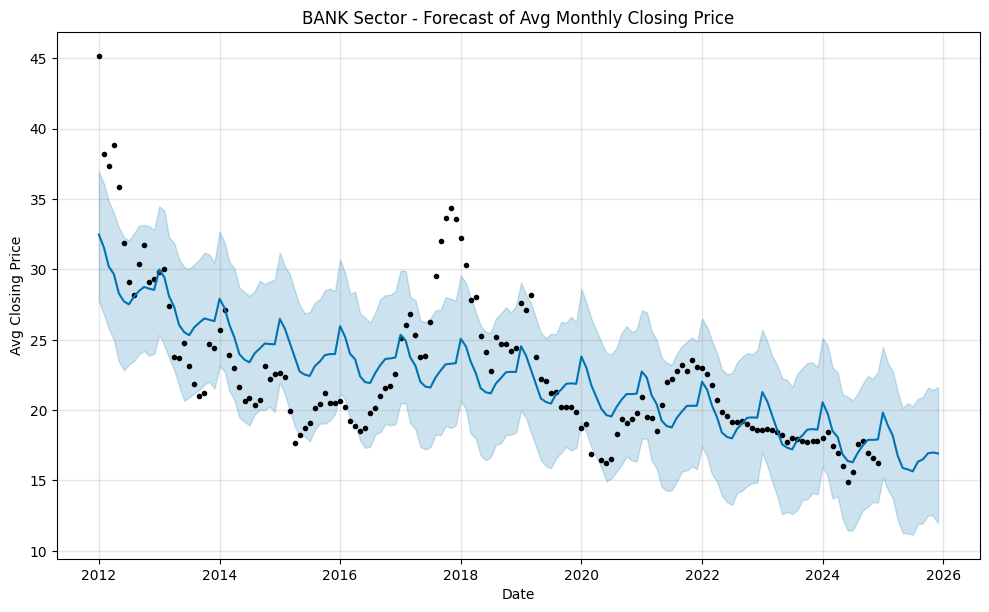

In [ ]:
model.plot(forecast)
plt.title("BANK Sector - Forecast of Avg Monthly Closing Price")
plt.xlabel("Date")
plt.ylabel("Avg Closing Price")
plt.show()


23:09:17 - cmdstanpy - INFO - Chain [1] start processing
23:09:31 - cmdstanpy - INFO - Chain [1] done processing
23:09:32 - cmdstanpy - INFO - Chain [1] start processing
23:09:35 - cmdstanpy - INFO - Chain [1] done processing
23:09:35 - cmdstanpy - INFO - Chain [1] start processing
23:09:37 - cmdstanpy - INFO - Chain [1] done processing
23:09:38 - cmdstanpy - INFO - Chain [1] start processing
23:09:38 - cmdstanpy - INFO - Chain [1] done processing
23:09:41 - cmdstanpy - INFO - Chain [1] start processing
23:09:55 - cmdstanpy - INFO - Chain [1] done processing
23:09:57 - cmdstanpy - INFO - Chain [1] start processing
23:10:01 - cmdstanpy - INFO - Chain [1] done processing
23:10:03 - cmdstanpy - INFO - Chain [1] start processing
23:10:08 - cmdstanpy - INFO - Chain [1] done processing
23:10:12 - cmdstanpy - INFO - Chain [1] start processing
23:10:25 - cmdstanpy - INFO - Chain [1] done processing
23:10:26 - cmdstanpy - INFO - Chain [1] start processing
23:10:29 - cmdstanpy - INFO - Chain [1]

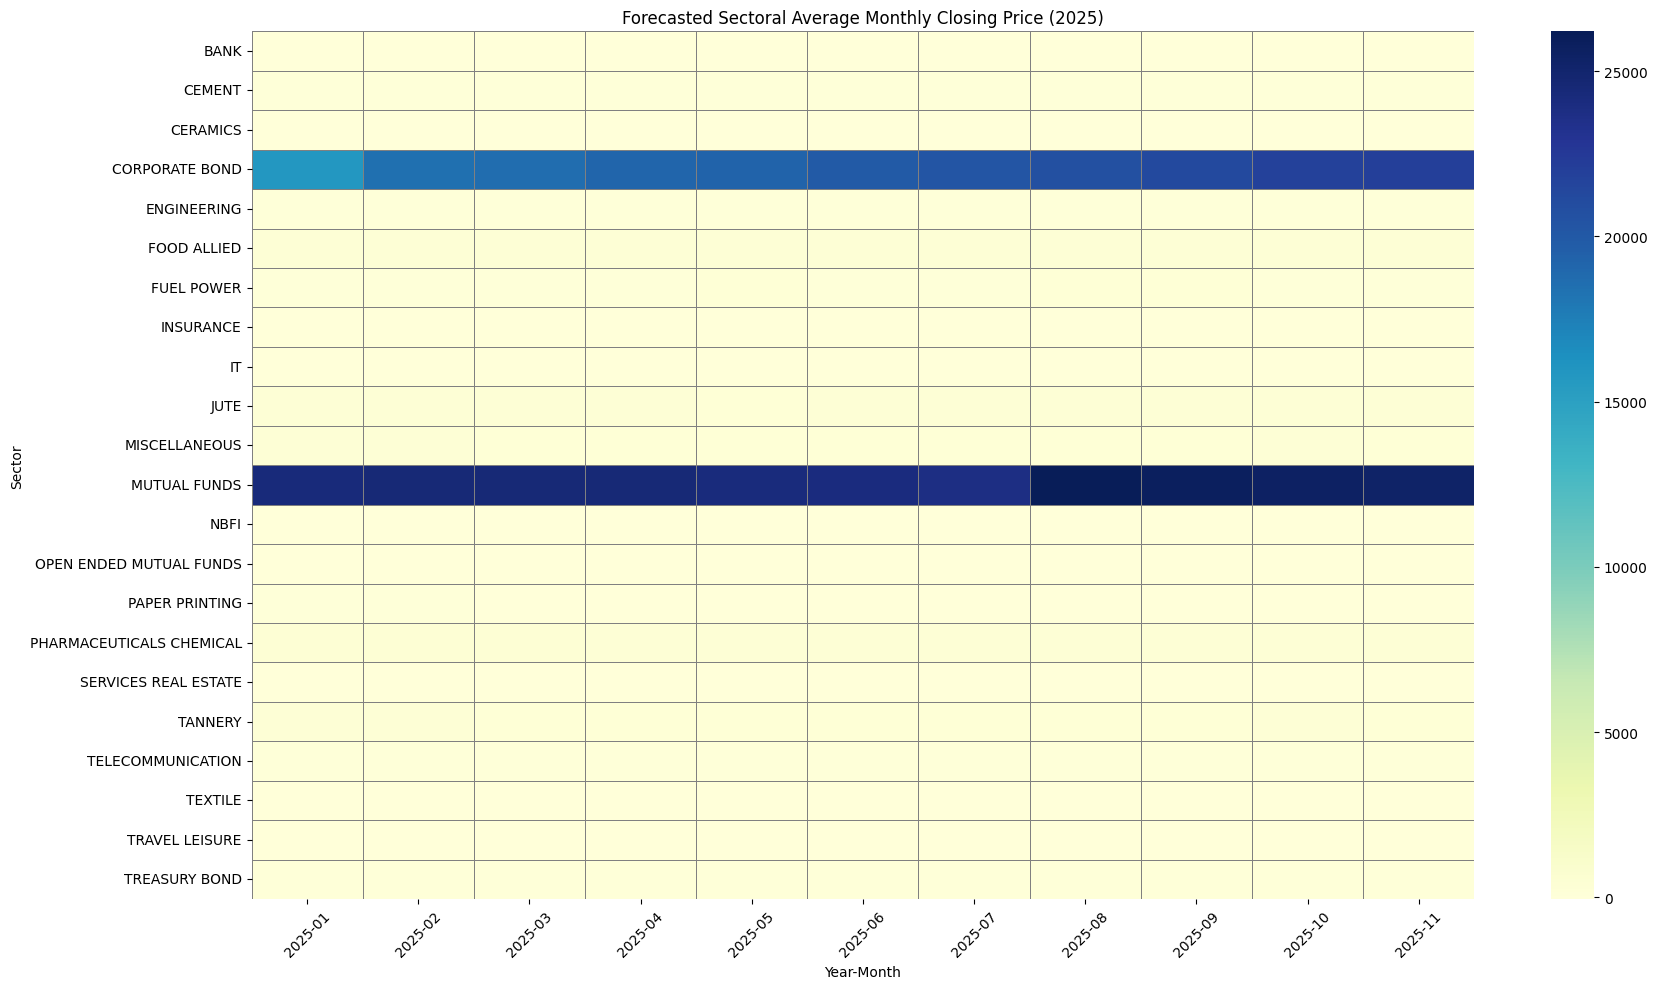

YearMonth,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
Sector,,,,,,,,,,,
BANK,31.888416,31.412596,15.909925,14.752896,15.165076,14.114784,14.312498,15.226971,15.863458,30.233297,15.712786
CEMENT,84.358436,84.899666,74.911455,76.504754,65.659575,77.594338,78.540174,83.297834,83.172136,81.100153,72.562973
CERAMICS,44.376305,42.079185,39.759984,37.975269,31.556987,34.988525,35.681502,38.753905,42.345836,34.692178,34.375379
CORPORATE BOND,15798.289328,18498.647444,18637.089311,19144.941697,19300.035676,19854.594819,20279.891240,20762.319654,21254.441909,21814.095736,22008.977213
ENGINEERING,114.647635,115.208614,82.345280,79.306424,71.824861,80.413193,82.277654,88.004395,87.093510,100.946388,62.898345
FOOD ALLIED,279.393649,281.631790,268.170267,271.974532,264.150854,271.856514,278.791720,290.489844,293.890331,301.579157,276.976927
FUEL POWER,102.674326,99.719502,152.937507,154.620723,164.883873,151.293662,150.997000,158.312382,156.449148,88.638834,138.775811
INSURANCE,-13.339756,-13.409671,41.632842,44.959215,47.154975,46.976058,44.747053,46.686071,48.496441,-17.695164,38.310225
IT,41.750030,40.396931,33.011028,32.435283,28.796492,30.280098,30.320464,31.595412,32.978437,35.783542,28.860003


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

# Optional: display more columns
pd.set_option('display.max_columns', 200)

# Create an empty list to store forecasts
forecasts = []

# Loop through each sector and forecast
for sector in clean_df['Sector'].unique():
    # Filter data for the current sector
    sector_data = clean_df[clean_df['Sector'] == sector]
    
    # Prepare the data for Prophet (ds: date, y: closing price)
    sector_data_prophet = sector_data[['Date', 'Closing_Price']].rename(columns={'Date': 'ds', 'Closing_Price': 'y'})
    
    # Skip sectors with less than 2 valid data points
    if sector_data_prophet['y'].notna().sum() < 2:
        continue

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(sector_data_prophet)
    
    # Make future predictions (for 12 months of 2025)
    future = model.make_future_dataframe(periods=12, freq='ME')  # Use 'ME' for month end
    forecast = model.predict(future)
    
    # Add sector name to the forecast
    forecast['Sector'] = sector
    
    # Append forecast to the list
    forecasts.append(forecast[['ds', 'yhat', 'Sector']])

# Combine all the forecasts
all_forecasts = pd.concat(forecasts)

# Create a new column combining Year and Month for better visualization
all_forecasts['YearMonth'] = all_forecasts['ds'].dt.year.astype(str) + '-' + all_forecasts['ds'].dt.month.astype(str).str.zfill(2)

# Filter only 2025 predictions
all_forecasts_2025 = all_forecasts[all_forecasts['ds'].dt.year == 2025]

# Pivot the results for a clearer comparison
forecast_pivot = all_forecasts_2025.pivot(index='Sector', columns='YearMonth', values='yhat')

# Replace NaN values with 0
forecast_pivot = forecast_pivot.fillna(0)

# Plot the heatmap for forecasts
plt.figure(figsize=(18, 10))
sns.heatmap(forecast_pivot, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Forecasted Sectoral Average Monthly Closing Price (2025)")
plt.xlabel("Year-Month")
plt.ylabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Show the forecast pivot table
forecast_pivot.head(22)


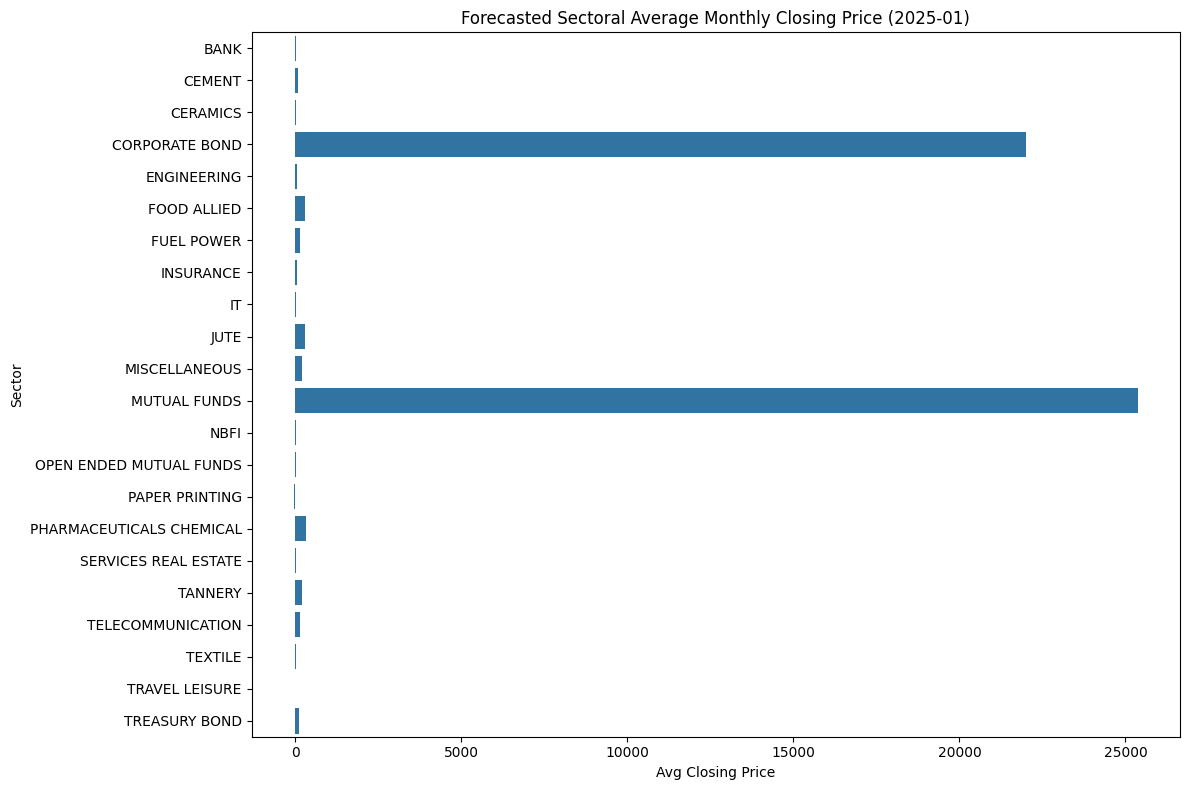

In [95]:
# Filter data for 2025-01

# Plot horizontal bar to show the ranking of the sectors for 2025-01
plt.figure(figsize=(12, 8))
sns.barplot(data= all_forecasts_2025[all_forecasts_2025['YearMonth'] == '2025-11'], y='Sector', x='yhat')
plt.title("Forecasted Sectoral Average Monthly Closing Price (2025-01)")
plt.xlabel("Avg Closing Price")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()